In [1]:
import pandas as pd
# Load dataset
df = pd.read_csv('online_course_enrollments.csv')
print(df.head())
print(df.info())

  enrollment_date course_id               course_name student_id  student_age  \
0      2024-05-07      C192                Course: ML     S75049           25   
1      2023-02-17      C111  Course: Business Analyst     S73819           26   
2      2023-11-10      C172  Course: Business Analyst     S91635           41   
3      2023-01-11      C167                 Course: C     S61328           36   
4      2023-12-22      C113    Course: Cyber Security     S90782           34   

  student_gender completion_status  engagement_metrics  
0           Male         Completed                  13  
1         Female         Completed                  31  
2         Female         Completed                  20  
3           Male         Completed                  62  
4           Male       In Progress                  84  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------       

In [2]:
# converting date column to datetime
df['enrollment_date'] = pd.to_datetime(df['enrollment_date'])

In [3]:
# Handle missing values
df.dropna(inplace=True)

In [4]:
df['year'] = df['enrollment_date'].dt.year
df['month'] = df['enrollment_date'].dt.month

print(df.describe())
enrollment_trends = df.groupby(['year', 'month']).size().reset_index(name='enrollments')
demographics = df.groupby('student_age').size().reset_index(name='count')
course_popularity = df.groupby('course_id').size().reset_index(name='enrollments')


                  enrollment_date  student_age  engagement_metrics  \
count                        1000  1000.000000         1000.000000   
mean   2023-07-31 17:29:45.600000    33.844000           50.169000   
min           2022-08-13 00:00:00    18.000000            1.000000   
25%           2023-01-30 18:00:00    26.000000           25.000000   
50%           2023-07-12 00:00:00    34.000000           50.000000   
75%           2024-01-31 00:00:00    42.000000           75.000000   
max           2024-08-12 00:00:00    49.000000           99.000000   
std                           NaN     9.296563           28.684373   

              year        month  
count  1000.000000  1000.000000  
mean   2023.088000     6.432000  
min    2022.000000     1.000000  
25%    2023.000000     3.000000  
50%    2023.000000     6.000000  
75%    2024.000000    10.000000  
max    2024.000000    12.000000  
std       0.704807     3.508801  


In [40]:
import pandas as pd

# Load the updated dataset
df = pd.read_csv('online_course_enrollments.csv')
enrollment_counts = df['course_name'].value_counts()
print(enrollment_counts)


course_name
Course: Soft Skills                67
Course: Power BI                   67
Course: MS-Excel                   67
Course: Cyber Security             60
Course: C                          58
Course: AI                         57
Course: OOPs and Error Handling    57
Course: Digital Marketing          56
Course: IOT                        56
Course: Business Analyst           55
Course: Personality Development    54
Course: ML                         54
Course: Data Science               53
Course: C++                        53
Course: Python                     49
Course: Java                       46
Course: Computer Network           46
Course: Data Visualization         45
Name: count, dtype: int64


In [11]:
import pandas as pd

# Load the updated dataset
df = pd.read_csv('online_course_enrollments.csv')
age_course_counts = df.groupby(['course_name', 'student_age']).size().reset_index(name='total_students')

pivot_table = age_course_counts.pivot_table(index='course_name', columns='student_age', values='total_students', fill_value=0)
# Total number of students enrolled in each course
course_totals = pivot_table.sum(axis=1)
# Maximum and minimum enrollment 
max_enroll_course = course_totals.idxmax()
min_enroll_course = course_totals.idxmin()

print("Total number of students enrolled in each course by age group:")
print(pivot_table)
print("\nTotal number of students enrolled in each course:")
print(course_totals)
print(f"\nCourse with the maximum enrollments: {max_enroll_course} ({course_totals[max_enroll_course]})")
print(f"Course with the minimum enrollments: {min_enroll_course} ({course_totals[min_enroll_course]})")


Total number of students enrolled in each course by age group:
student_age                       18   19   20   21   22   23   24   25   26  \
course_name                                                                    
Course: AI                       2.0  1.0  4.0  1.0  0.0  1.0  2.0  2.0  4.0   
Course: Business Analyst         2.0  1.0  1.0  2.0  1.0  2.0  1.0  1.0  4.0   
Course: C                        0.0  3.0  1.0  5.0  2.0  1.0  3.0  2.0  1.0   
Course: C++                      0.0  0.0  1.0  2.0  1.0  0.0  1.0  0.0  2.0   
Course: Computer Network         1.0  2.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0   
Course: Cyber Security           3.0  1.0  0.0  2.0  1.0  2.0  1.0  1.0  2.0   
Course: Data Science             0.0  3.0  1.0  0.0  2.0  1.0  0.0  0.0  3.0   
Course: Data Visualization       2.0  2.0  4.0  1.0  3.0  2.0  0.0  0.0  2.0   
Course: Digital Marketing        4.0  1.0  0.0  3.0  0.0  5.0  1.0  0.0  2.0   
Course: IOT                      2.0  2.0  2.0  3.0  1.0 

Average Age of Students: 33.84


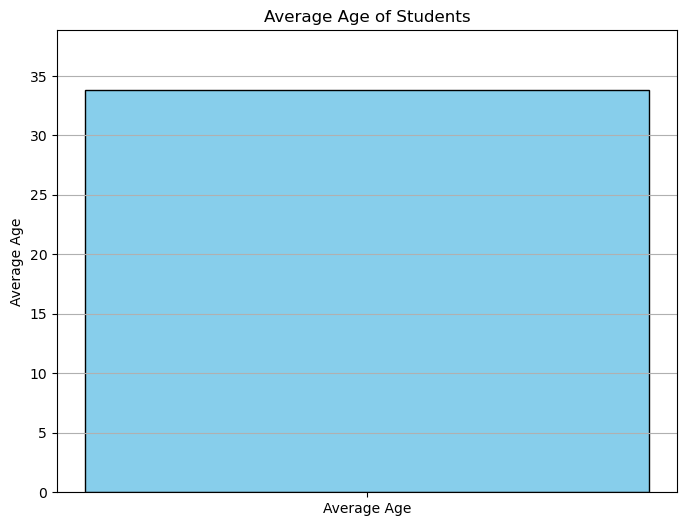

In [42]:
# Calculate the average age
average_age = df['student_age'].mean()
print(f"Average Age of Students: {average_age:.2f}")

# Create a bar chart to visualize the average age
plt.figure(figsize=(8, 6))
plt.bar(['Average Age'], [average_age], color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Average Age of Students')
plt.ylabel('Average Age')
plt.ylim(0, average_age + 5)  
plt.grid(axis='y')

# Show the bar chart
plt.show()


<Figure size 1400x800 with 0 Axes>

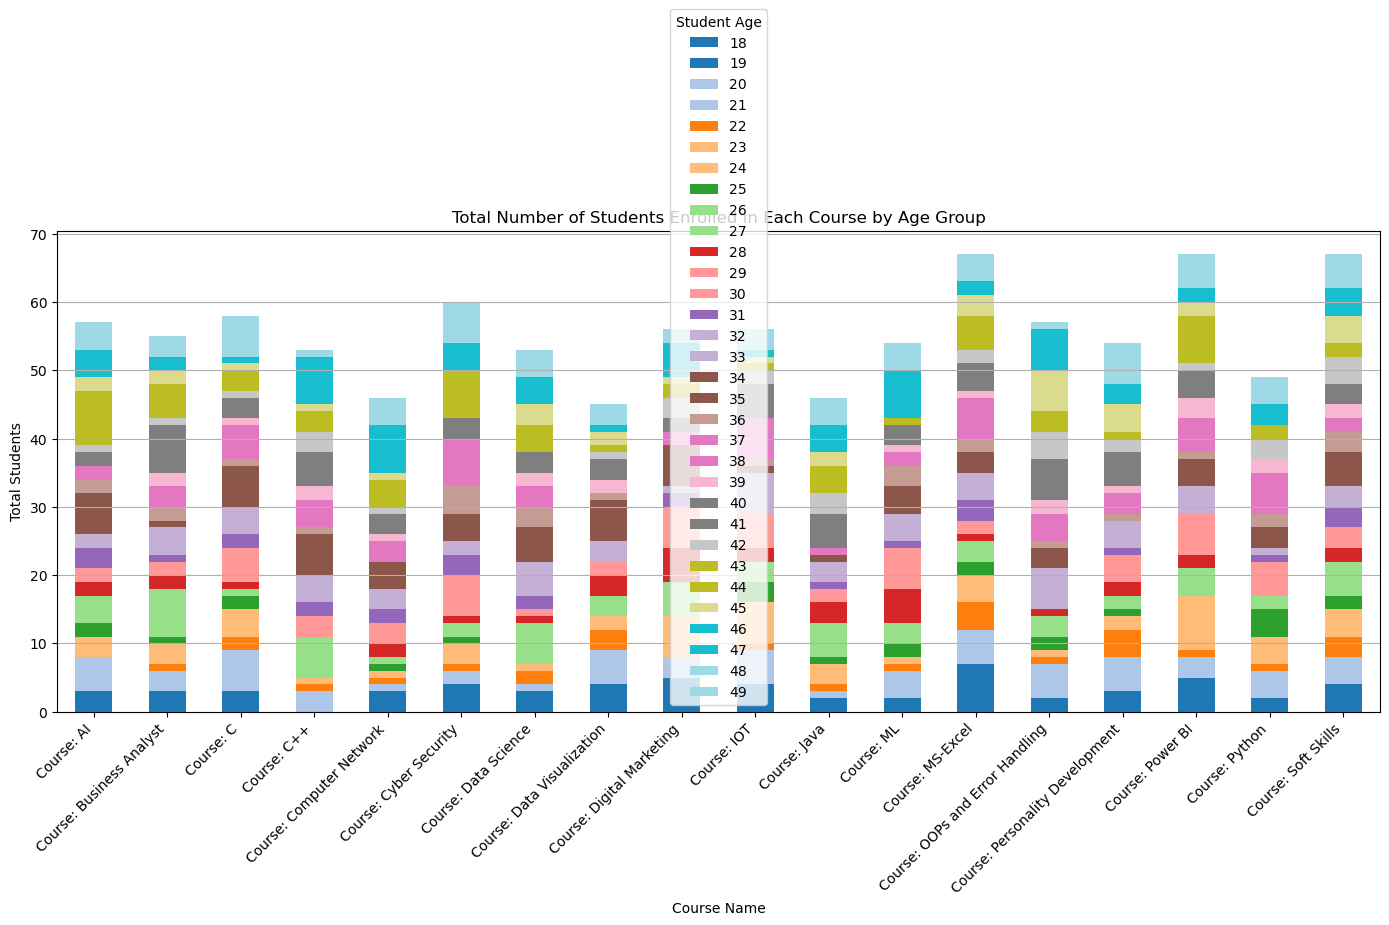

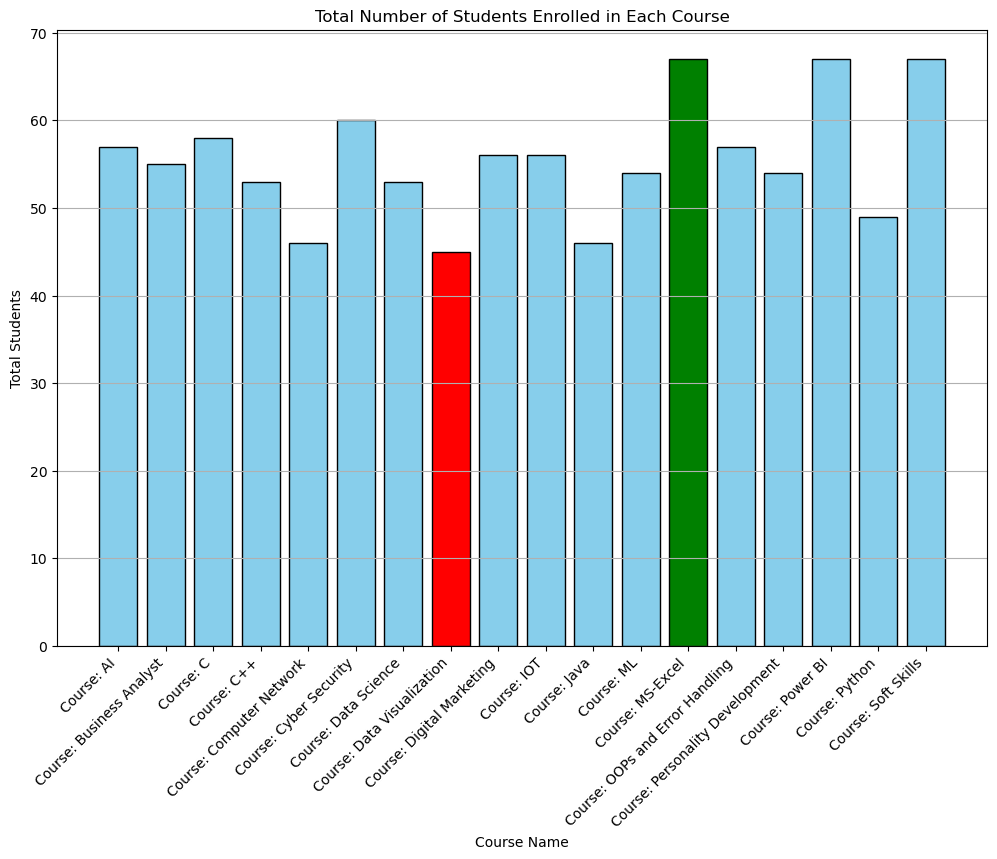

In [43]:
# Group by course name and student age, then count the number of students
age_course_counts = df.groupby(['course_name', 'student_age']).size().reset_index(name='total_students')
# Pivot the table to get total students enrolled in each course by age group
pivot_table = age_course_counts.pivot_table(index='course_name', columns='student_age', values='total_students', fill_value=0)
# Calculate the total number of students enrolled in each course
course_totals = pivot_table.sum(axis=1)
# Find the course with the maximum and minimum enrollments
max_enroll_course = course_totals.idxmax()
min_enroll_course = course_totals.idxmin()

# Plot the Stacked Bar Chart
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Total Number of Students Enrolled in Each Course by Age Group')
plt.xlabel('Course Name')
plt.ylabel('Total Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Student Age')
plt.grid(axis='y')
plt.tight_layout()  
plt.show()

# Plot the Bar Chart for total enrollments
plt.figure(figsize=(12, 8))
colors = ['green' if course == max_enroll_course else 'red' if course == min_enroll_course else 'skyblue' for course in course_totals.index]
plt.bar(course_totals.index, course_totals.values, color=colors, edgecolor='black')
plt.title('Total Number of Students Enrolled in Each Course')
plt.xlabel('Course Name')
plt.ylabel('Total Students')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


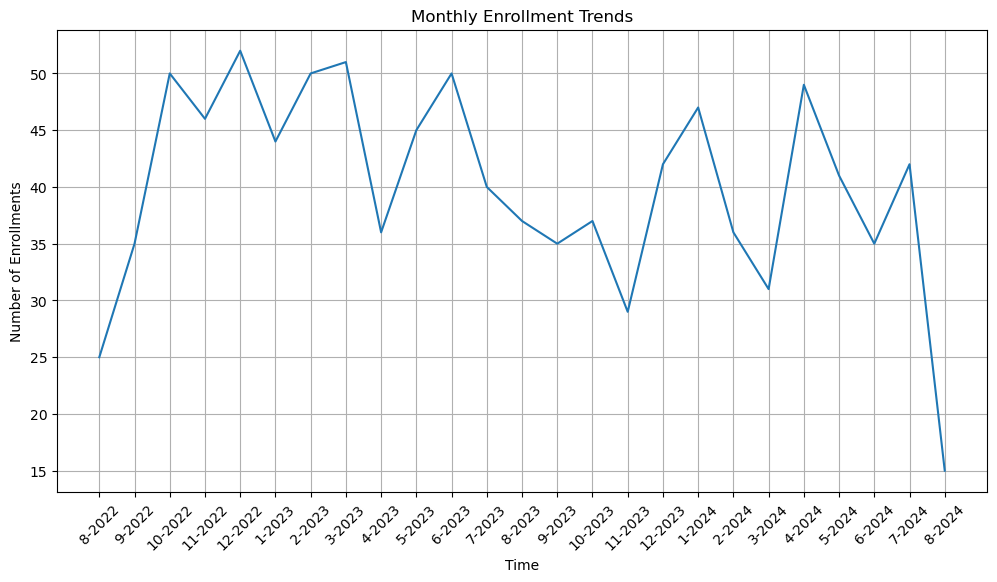

In [17]:
import matplotlib.pyplot as plt

#Enrollment Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(enrollment_trends['month'].astype(str) + '-' + enrollment_trends['year'].astype(str), enrollment_trends['enrollments'])
plt.title('Monthly Enrollment Trends')
plt.xlabel('Time')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


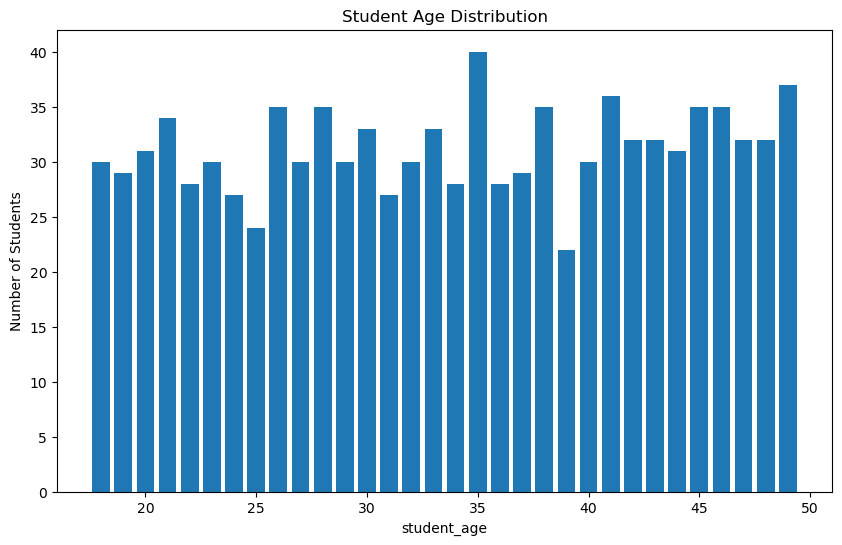

In [19]:
#Student Demographics Distribution
plt.figure(figsize=(10, 6))
plt.bar(demographics['student_age'], demographics['count'])
plt.title('Student Age Distribution')
plt.xlabel('student_age')
plt.ylabel('Number of Students')
plt.show()

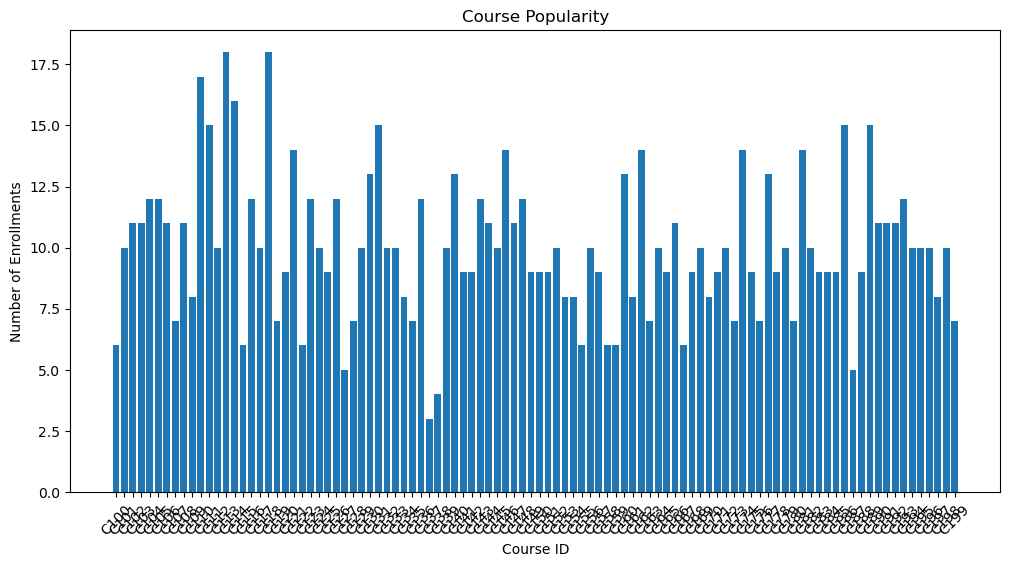

In [21]:
#Course Popularity
plt.figure(figsize=(12, 6))
plt.bar(course_popularity['course_id'], course_popularity['enrollments'])
plt.title('Course Popularity')
plt.xlabel('Course ID')
plt.ylabel('Number of Enrollments')
plt.xticks(rotation=45)
plt.show()


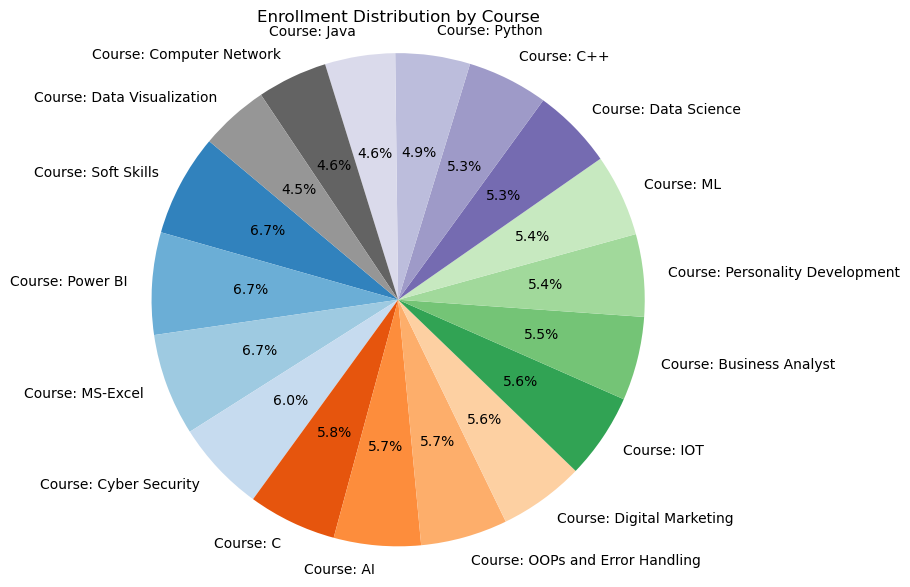

In [22]:
# Count the number of enrollments for each course
course_counts = df['course_name'].value_counts()

# Prepare the data for plotting
labels = course_counts.index
sizes = course_counts.values

# Define a custom color palette
colors = plt.cm.tab20c(range(len(labels)))

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Enrollment Distribution by Course')
plt.axis('equal')  
plt.show()


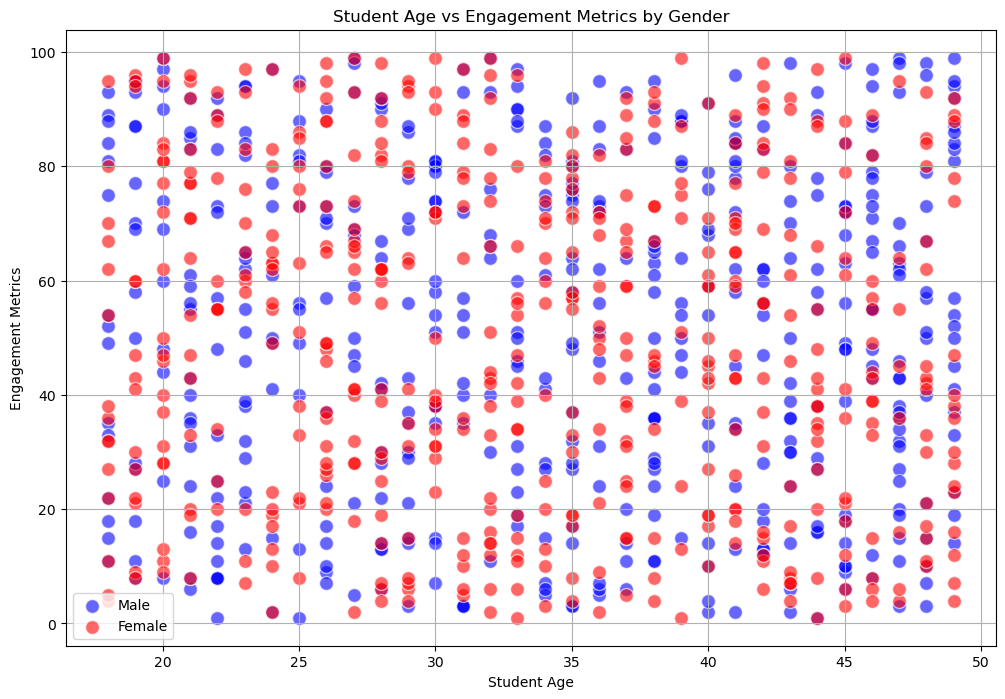

In [23]:
# Filter data by gender
male_data = df[df['student_gender'] == 'Male']
female_data = df[df['student_gender'] == 'Female']
plt.figure(figsize=(12, 8))
# Scatter plot for Male students
plt.scatter(male_data['student_age'], male_data['engagement_metrics'], 
            color='blue', alpha=0.6, label='Male', edgecolors='w', s=100)
# Scatter plot for Female students
plt.scatter(female_data['student_age'], female_data['engagement_metrics'], 
            color='red', alpha=0.6, label='Female', edgecolors='w', s=100)
plt.title('Student Age vs Engagement Metrics by Gender')
plt.xlabel('Student Age')
plt.ylabel('Engagement Metrics')
plt.legend()  
plt.grid(True)
plt.show()


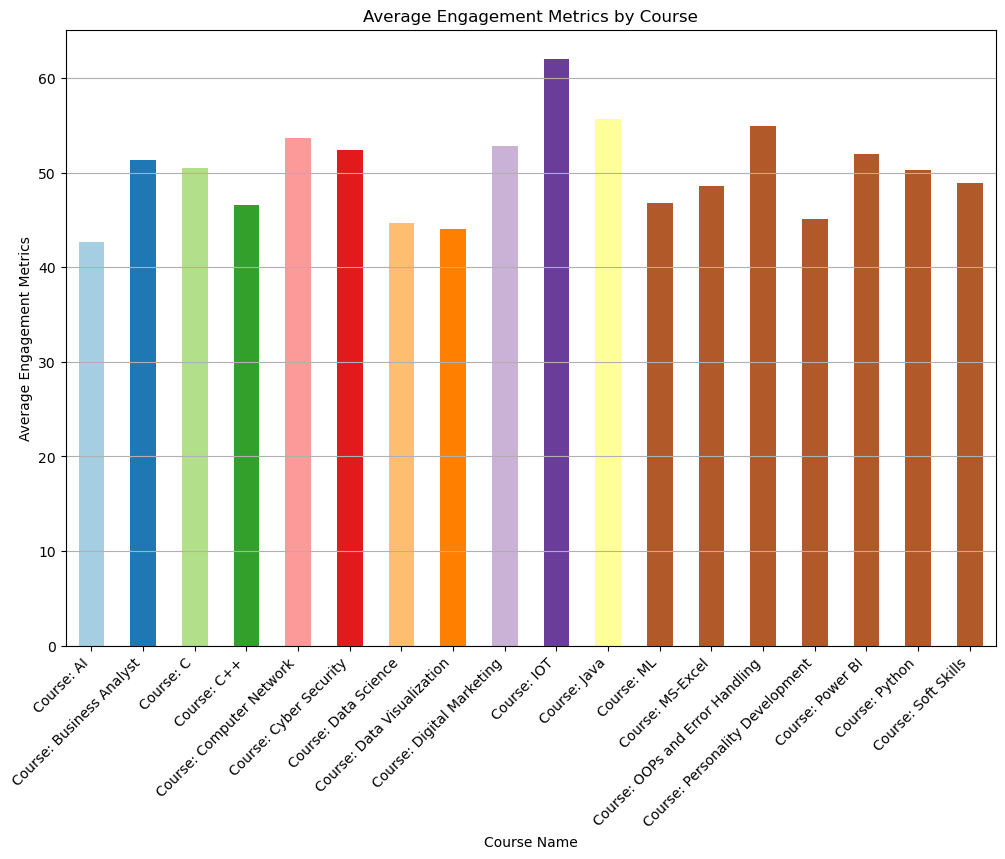

In [27]:
# Calculate average engagement metrics for each course
average_engagement = df.groupby('course_name')['engagement_metrics'].mean()
# Create the bar chart
plt.figure(figsize=(12, 8))
average_engagement.plot(kind='bar', color=plt.cm.Paired(range(len(average_engagement))))
plt.title('Average Engagement Metrics by Course')
plt.xlabel('Course Name')
plt.ylabel('Average Engagement Metrics')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y')
plt.show()

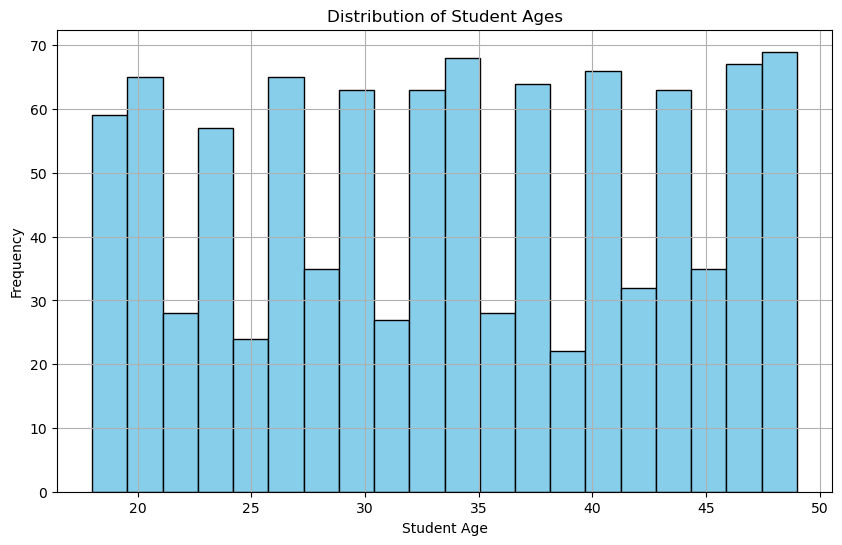

In [28]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['student_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Student Ages')
plt.xlabel('Student Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

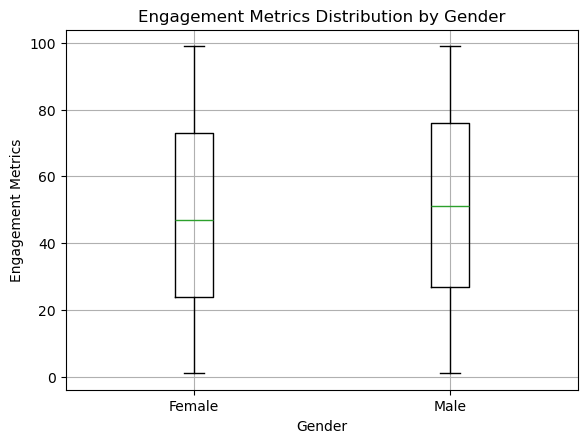

In [36]:
# Create the box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='engagement_metrics', by='student_gender', grid=True, 
           boxprops=dict(color='black'), whiskerprops=dict(color='black'))
plt.title('Engagement Metrics Distribution by Gender')
plt.suptitle('')  
plt.xlabel('Gender')
plt.ylabel('Engagement Metrics')
plt.show()


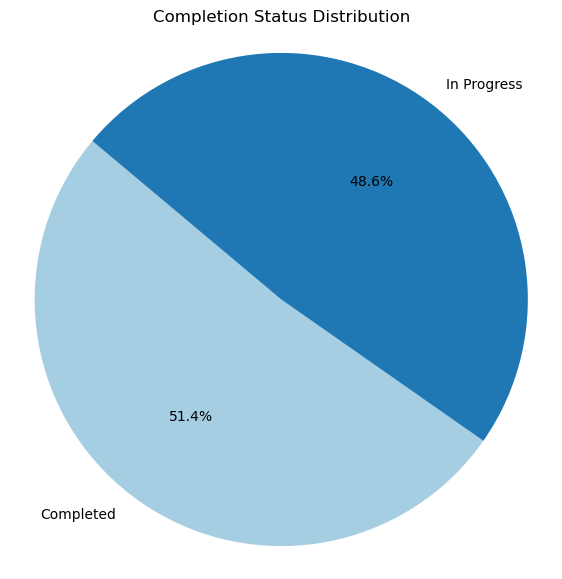

In [38]:
# Count the number of each completion status
completion_counts = df['completion_status'].value_counts()
labels = completion_counts.index
sizes = completion_counts.values
colors = plt.cm.Paired(range(len(labels)))  
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Completion Status Distribution')
plt.axis('equal')  
plt.show()
